### Implement and compare MLE and SSE based classifiers to the one implemented by Scikit-Learn

In this code, we Implement the Logistic regression method and compare it with the Logistic regression provided by the Scikit-learn package on the given dataset.

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Epoch = 250  #Number of iterations for which our implementation will run.

X = np.loadtxt("DIY_Logistic_Regression_Compare/X.dat")  #add path to dataset (download from datasets folder)
y = np.loadtxt("DIY_Logistic_Regression_Compare/y.dat")

print("X's shape:", X.shape)
print()
print("First 5 values of X: ",X[:5])

print()
print("y's shape:", y.shape)
print("First 5 values of y: ",y[0:5])   #Seems Y lies between -1 and 1, we need them to be between 0 and 1, lets replace -1 with 0.
y_new = np.where(y == -1, 0, y)  #earlier -1 to 1, now 0 to 1


#let's take mean of each column and subtract them from the values of columns separately. 
X[:,0] = X[:,0]-X[:,0].mean()
X[:,1] = X[:,1]-X[:,1].mean()

print()
print("After removing mean values...")
print("X's shape:", X.shape)
print()
print("First 5 values of X: ",X[:5])

X's shape: (400, 2)

First 5 values of X:  [[ 1.35368389 -1.47354927]
 [ 2.21302335 -4.28850577]
 [ 0.81906465 -4.41770364]
 [ 1.99773617 -4.32551091]
 [ 2.18759071 -5.42848335]]

y's shape: (400,)
First 5 values of y:  [ 1. -1. -1. -1. -1.]

After removing mean values...
X's shape: (400, 2)

First 5 values of X:  [[-0.20764697  1.45274636]
 [ 0.65169249 -1.36221014]
 [-0.74226621 -1.49140801]
 [ 0.43640531 -1.39921528]
 [ 0.62625985 -2.50218772]]


**Create Classifier from Scikit-Learn package and calculate final weights value as well as the accuracy**

Final Weights Scikit:  [[0.69229133 2.16724416]]
Accuracy:  0.925


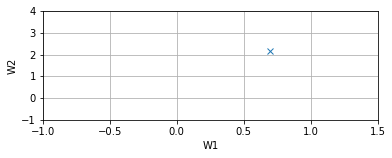

In [2]:
clf = LogisticRegression(fit_intercept=False,penalty='none',max_iter=100).fit(X, y_new)

print("Final Weights Scikit: ",clf.coef_)
print("Accuracy: ",clf.score(X, y_new))

#Plotting the coefficients....
plt.figure(figsize=(6, 2))
plt.plot(clf.coef_[0][0],clf.coef_[0][1],'x')

plt.xlabel("W1")
plt.ylabel("W2")
plt.grid()
plt.xlim([-1.0, 1.5])
plt.ylim([-1.0, 4.0])
plt.show()


### **Implement SSE loss function to update the weights, while using sigmoid decision rule.**

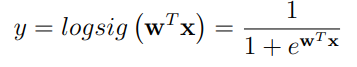

**Weight updatation can be done by following**

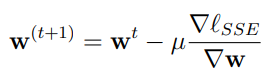

**Gradient loss can be defined by the following derivation**

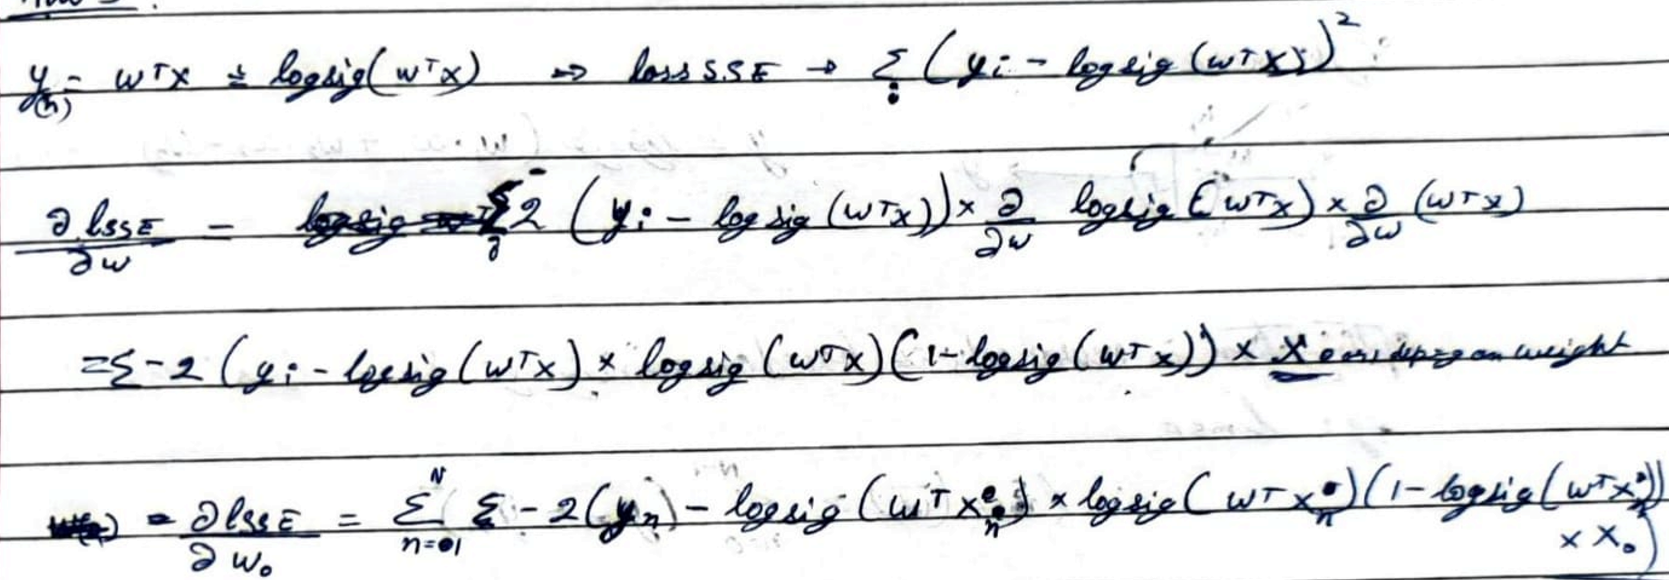

In [3]:
##========= SSE Implementation

mu = 0.001
SSE_Wts = np.zeros((1,2), dtype=float)
SSE_acc = np.zeros(1, dtype=float)

initial_weights = np.asarray([1.0, -1.0])  #W1,W2
Weights_SSE = initial_weights.copy()

# Function to calculate the logsig as given in formula
def Logsig(x,w):
    val = np.dot(x, w.T)           #weighted sum of inputs
    return 1 / (1 + np.exp(-val))

def Grad_loss(y,x,w,x_0_1):
    loss = np.sum(-2*(y - Logsig(x,w))* Logsig(x,w) * (1-Logsig(x,w)) * x_0_1)  #As stated in our derivation... 
    return loss

#Function to calculate the accuracy by setting up the thresholds to create true-false mask.
def accuracy(y,X,Weights):
    y_hat = Logsig(X,Weights)
    #print(y_hat)
    F = y_hat < 0.5
    y_hat[F] = 0
    T = y_hat >= 0.5
    y_hat[T] = 1

    score = accuracy_score(y,y_hat)  #Y_gt values and Y_predicted
    return score



#### Execute and get accuracies for our SSE implementation

In [4]:

for i in range (Epoch):
    Weights_SSE[0] = Weights_SSE[0] - mu * Grad_loss(y_new, X, Weights_SSE, X[:,0])#Y_gt values (between 0 and 1), X (normalised), X's first col.
    Weights_SSE[1] = Weights_SSE[1] - mu * Grad_loss(y_new, X, Weights_SSE, X[:,1])#Y_gt values (between 0 and 1), X (normalised), X's second col.

    SSE_Wts=np.append(SSE_Wts, [Weights_SSE],axis=0)
    score = accuracy(y_new, X, Weights_SSE)  #Y_gt values and Y_predicted
    
    SSE_acc = np.append(SSE_acc, score)
    
    #print(i,": ", Weights)
SSE_Wts = np.delete(SSE_Wts, 0, axis = 0)
SSE_acc = np.delete(SSE_acc, 0, axis = 0)


score = accuracy(y_new,X,Weights_SSE)
print("Final SSE Weights:",Weights_SSE)
print("SSE Accuracy:",score)


Final SSE Weights: [0.66982525 1.76954942]
SSE Accuracy: 0.925


#### Implement MLE function

**Gradient loss**

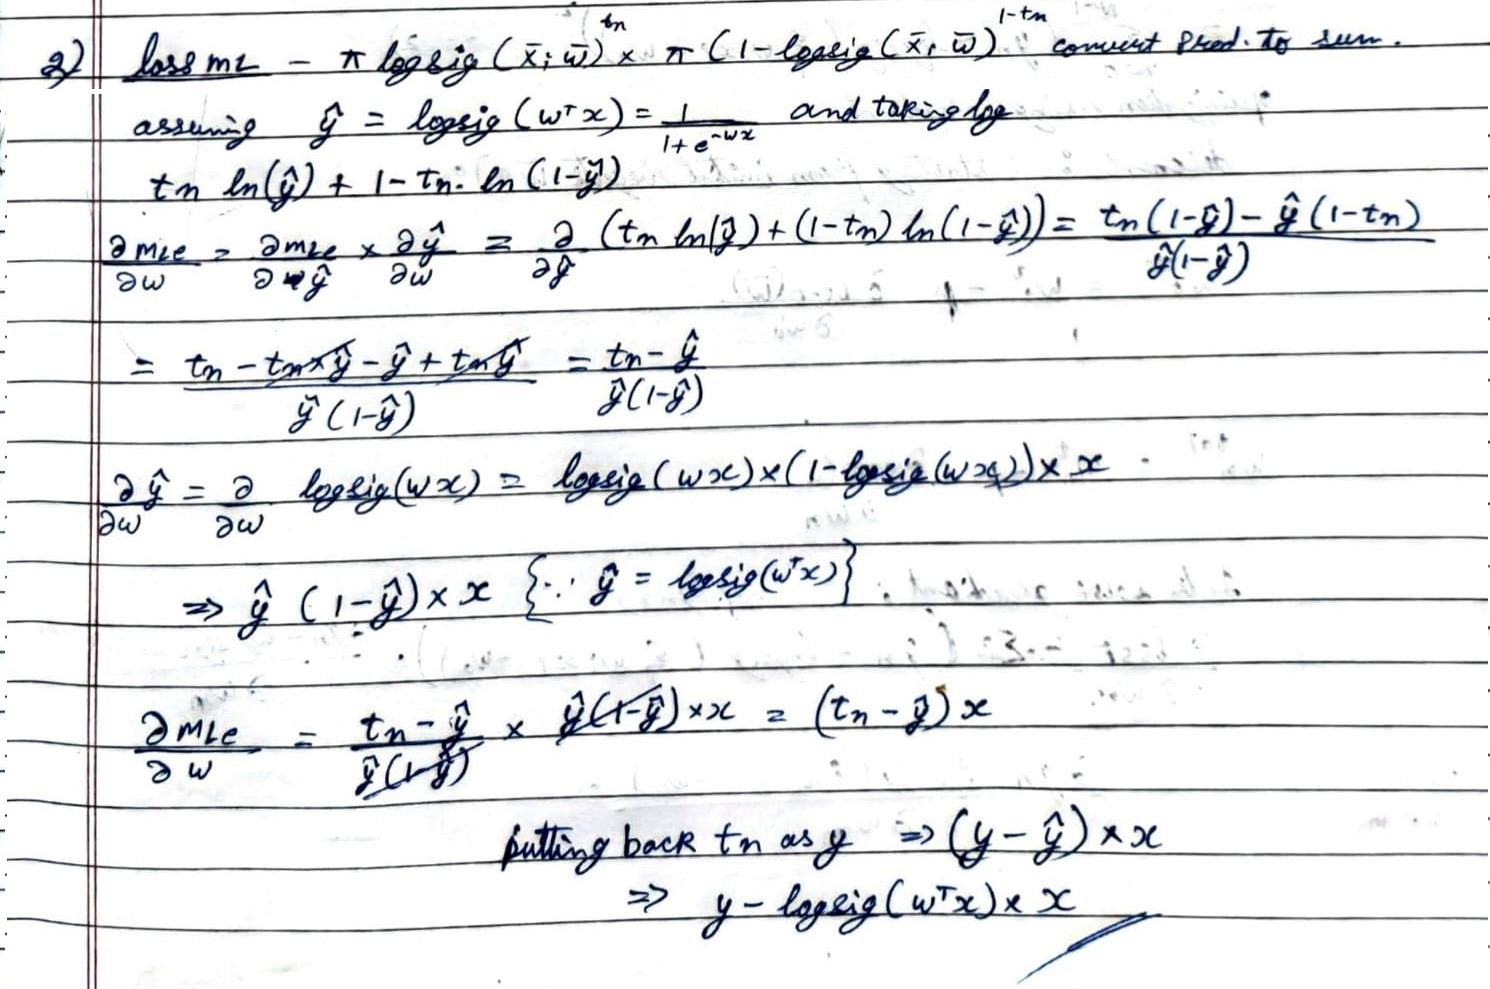

**Weight updatation can be done by following**

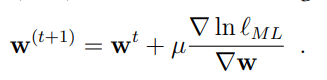

In [5]:
##============= MLE Implementation

mu=0.001
MLE_Wts = np.zeros((1,2), dtype=float)
MLE_acc = np.zeros(1, dtype=float)

initial_weights = np.asarray([1.0, -1.0])  #W1,W2
Weights_MLE = initial_weights.copy()
MLE_Wts=np.append(MLE_Wts, [Weights_MLE],axis=0)


def Grad_loss_MLE(y,x,w,x_0_1):
    loss = np.sum((y - Logsig(x,w)) * x_0_1)  #implement the derived function.
    return loss

for i in range (Epoch):
    Weights_MLE[0] = Weights_MLE[0] + mu * Grad_loss_MLE(y_new, X, Weights_MLE, X[:,0])  #Update weights for col. 0
    Weights_MLE[1] = Weights_MLE[1] + mu * Grad_loss_MLE(y_new, X, Weights_MLE, X[:,1])  #Update weights for col. 1

    MLE_Wts = np.append(MLE_Wts, [Weights_MLE],axis=0)  #Used later for plotting the wieght updation path...
    score = accuracy(y_new, X, Weights_MLE)  #Y_gt values and Y_predicted
    
    MLE_acc = np.append(MLE_acc, score)

MLE_Wts = np.delete(MLE_Wts, 0, axis = 0)
MLE_acc = np.delete(MLE_acc, 0, axis = 0)

score = accuracy(y_new,X,Weights_MLE)
print("Final MLE Weights:",Weights_MLE)
print("MLE Accuracy:",score)



Final MLE Weights: [0.67606608 2.14492107]
MLE Accuracy: 0.925


### Plot and Compare all methods

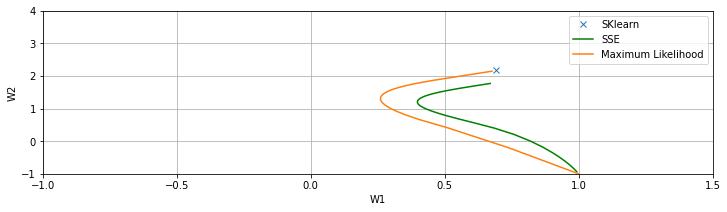

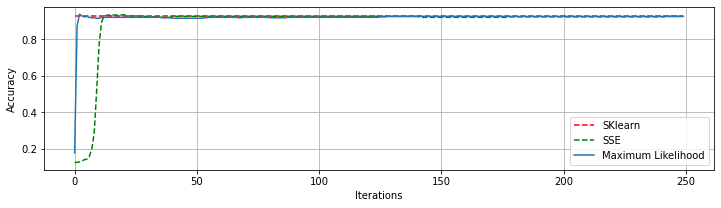

In [6]:
#========== PLOT

plt.figure(figsize=(12, 3))

plt.plot(clf.coef_[0][0],clf.coef_[0][1],'x') #SkLearn
plt.plot(SSE_Wts[:,0],SSE_Wts[:,1],'g-') #SSE
plt.plot(MLE_Wts[:,0],MLE_Wts[:,1],'-') #MLE 

plt.xlabel("W1")
plt.ylabel("W2")
plt.grid()
plt.xlim([-1.0, 1.5])
plt.ylim([-1.0, 4.0])
plt.legend(["SKlearn","SSE","Maximum Likelihood"])
plt.show()

#====================================== Accuracy
plt.figure(figsize=(12, 3))


plt.plot(np.arange(0,SSE_acc.shape[0]),np.ones(len(SSE_acc))*clf.score(X, y_new),'r--') #SK Learn 
plt.plot(np.arange(0,SSE_acc.shape[0]),SSE_acc,'g--') #SSE
plt.plot(np.arange(0,SSE_acc.shape[0]),MLE_acc,'-')  #MLE



plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(["SKlearn","SSE","Maximum Likelihood"])
plt.show()


It seems Our MLE implementation is pretty good!! SSE is not bad either, it requies some extra epochs to reach similar accuracies.